<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/DMAC_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Using the Dual Moving Average Crossover to Determine When to Buy and Sell Stock
 

In [24]:
# Import the libraries
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')


In [25]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [26]:
# Store the data into a dataframe and view the dataframe
df = pd.read_csv('AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-08,200.809998,201.399994,198.410004,200.020004,197.661011,25338600
1,2019-07-09,199.199997,201.509995,198.809998,201.240005,198.866638,20578000
2,2019-07-10,201.850006,203.729996,201.559998,203.229996,200.833160,17897100
3,2019-07-11,203.309998,204.389999,201.710007,201.750000,199.370621,20191800
4,2019-07-12,202.449997,204.000000,202.199997,203.300003,200.902344,17595200
...,...,...,...,...,...,...,...
246,2020-06-26,364.410004,365.320007,353.019989,353.630005,353.630005,51314200
247,2020-06-29,353.250000,362.170013,351.279999,361.779999,361.779999,32661500
248,2020-06-30,360.079987,365.980011,360.000000,364.799988,364.799988,35055800
249,2020-07-01,365.119995,367.359985,363.910004,364.109985,364.109985,27684300


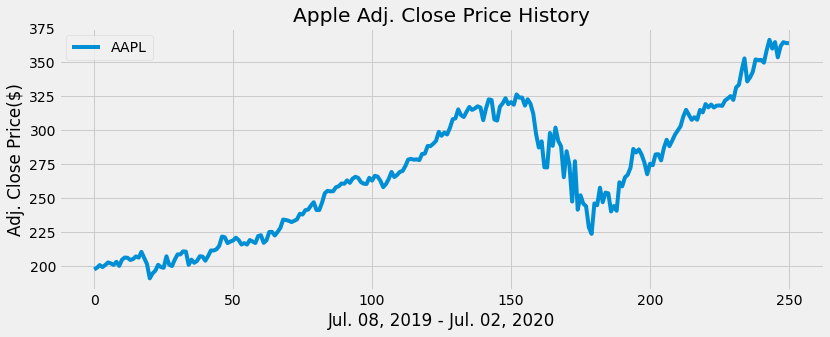

In [27]:
# Visualize the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Adj Close'], label = 'AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Jul. 08, 2019 - Jul. 02, 2020')
plt.ylabel('Adj. Close Price($)')
plt.legend(loc='upper left')
plt.show()


In [28]:
# Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = df['Adj Close'].rolling(window=30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
246,334.765666
247,336.567999
248,338.229332
249,339.928331


In [29]:
# Create the long term average with a simple moving 100 day average 
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = df['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
246,298.105444
247,298.525012
248,298.937371
249,299.386811


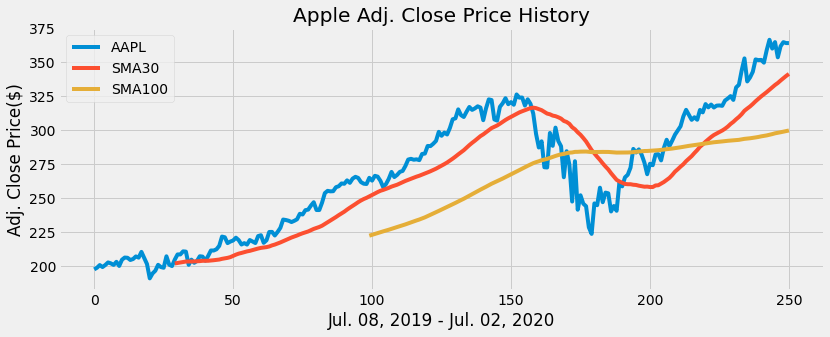

In [30]:
# Visualize the data again
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Jul. 08, 2019 - Jul. 02, 2020')
plt.ylabel('Adj. Close Price($)')
plt.legend(loc='upper left')
plt.show()

Whenever the short-term average crosses the long-term average, that's the indication of a shift in momentum which is an indication for us to either buy or sell the stock.

In [31]:
# Create a new dataframe to store the data
data = pd.DataFrame()
data['df'] = df['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,df,SMA30,SMA100
0,197.661011,NaN,NaN
1,198.866638,NaN,NaN
2,200.833160,NaN,NaN
3,199.370621,NaN,NaN
4,200.902344,NaN,NaN
...,...,...,...
246,353.630005,334.765666,298.105444
247,361.779999,336.567999,298.525012
248,364.799988,338.229332,298.937371
249,364.109985,339.928331,299.386811


In [39]:
# Create a function to signal when to buy or sell the stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)): 
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['df'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(data['df'][i])
          flag = 0
      else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)



In [40]:
# Store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]


In [41]:
# Show the data
data

,df,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,197.661011,NaN,NaN,NaN,NaN
1,198.866638,NaN,NaN,NaN,NaN
2,200.833160,NaN,NaN,NaN,NaN
3,199.370621,NaN,NaN,NaN,NaN
4,200.902344,NaN,NaN,NaN,NaN
...,...,...,...,...,...
246,353.630005,334.765666,298.105444,NaN,NaN
247,361.779999,336.567999,298.525012,NaN,NaN
248,364.799988,338.229332,298.937371,NaN,NaN
249,364.109985,339.928331,299.386811,NaN,NaN


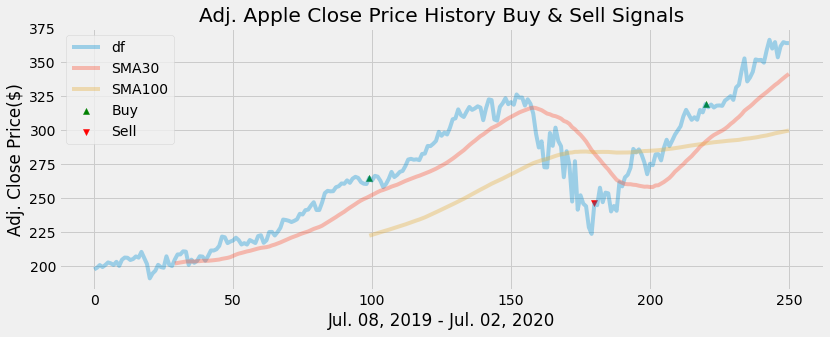

In [42]:
# Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.2, 4.5))
plt.plot(data['df'], label = 'df', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color='red')
plt.title('Adj. Apple Close Price History Buy & Sell Signals')
plt.xlabel('Jul. 08, 2019 - Jul. 02, 2020')
plt.ylabel('Adj. Close Price($)')
plt.legend(loc='upper left')
plt.show()

The Indicators leave room for improvement. However, given that the dataset is not large enough for this strategy, it gave good buying Signals.